In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

from anfis_ba import *

In [2]:
expressions = {"P":"Precipitation", "E":"Potential evapotranspiration", "PB":"Precipation balance", "Tave":"Tave"}
selected_features = ["Relative_yield_change", "Tave", "Tmax", "Tmin"]#["z", "x", "y"]

In [3]:
x = np.random.choice(1000, 1000, replace=True)
y = np.random.choice(1000, 1000, replace=True)
x_test = np.random.choice(1000, 200, replace=True)
y_test = np.random.choice(1000, 200, replace=True)
benchmark_func = lambda x,y: x + y
z = benchmark_func(x,y)
z_test = benchmark_func(x_test,y_test)
train_data = pd.DataFrame({"z" : z, "x" : x, "y" : y})
test_data = pd.DataFrame({"z" : z_test, "x" : x_test, "y" : y_test})

In [4]:
train_data = pd.read_csv("dataset/matlab_1_train.csv")[selected_features]
test_data = pd.read_csv("dataset/matlab_1_test.csv")[selected_features]

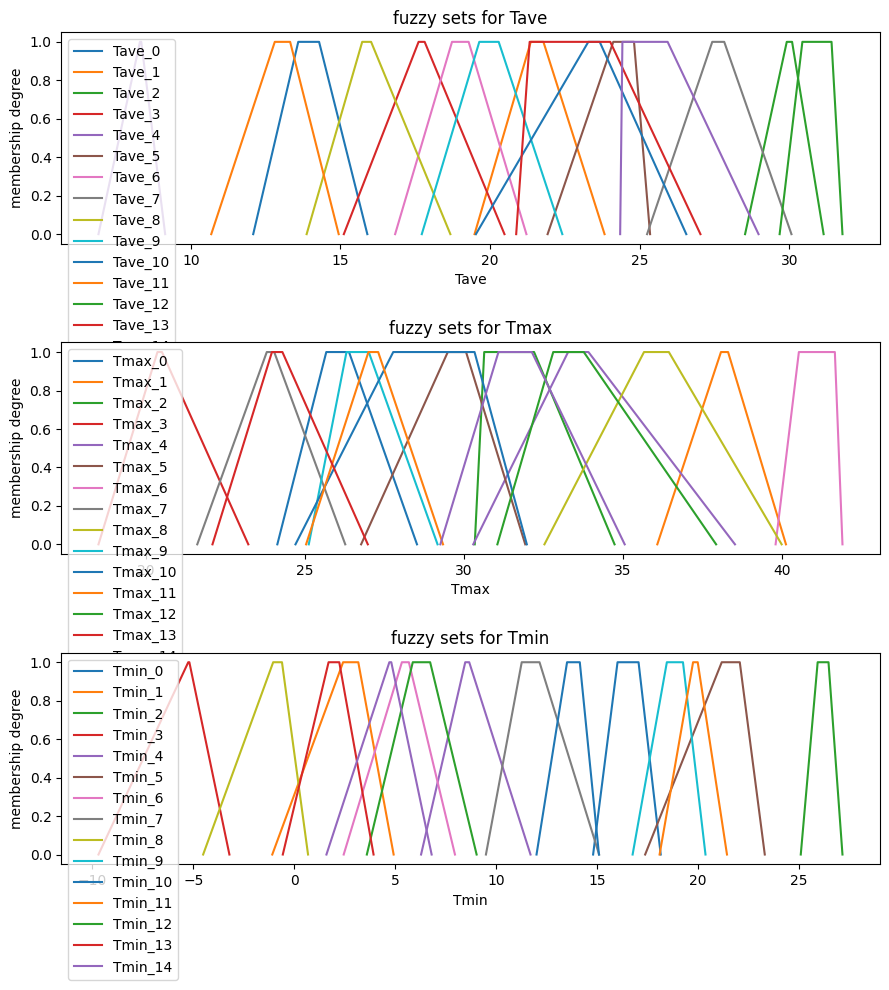

0.23243809404620075

In [5]:
test_model = TSKModel()
test_model.create_rulebase_kmeans(train_data, n_rules=20, n_fuzzy_sets=15, expressions=expressions)
test_model.show_fuzzy_sets()
test_model.r2_scores

In [6]:
row = 134
cur_x = test_data.iloc[row,1:]
print("Cur x list: \n", cur_x, end="\n\n")
actual = test_model.calculate_output(cur_x.to_numpy(), activate_debug=True)
print("\nExpected:", test_data.iloc[row,0], "Actual:", actual)

Cur x list: 
 Tave    18.61667
Tmax    29.86553
Tmin     6.86344
Name: 134, dtype: float64

Rule 0: 	 Firing strength: 0.8845074775389189, Consequent value: -0.26142021506282587
Rule 1: 	 Firing strength: 0, Consequent value: 2.4020103691830705
Rule 2: 	 Firing strength: 0.0, Consequent value: -0.6337308768405449
Rule 3: 	 Firing strength: 0, Consequent value: -0.39832269893302036
Rule 4: 	 Firing strength: 0, Consequent value: 0.11744454676706047
Rule 5: 	 Firing strength: 0.0, Consequent value: -0.021656103660127834
Rule 6: 	 Firing strength: 0, Consequent value: -0.16394468697063314
Rule 7: 	 Firing strength: 0, Consequent value: 0.5804140233696728
Rule 8: 	 Firing strength: 0, Consequent value: -5.517590144994597
Rule 9: 	 Firing strength: 0, Consequent value: -2.6635943776697837
Rule 10: 	 Firing strength: 0, Consequent value: -3.7496726230442285
Rule 11: 	 Firing strength: 0.0, Consequent value: -0.1377700587263292
Rule 12: 	 Firing strength: 0, Consequent value: -0.1020085794817

In [7]:
test_model.test_model(test_data)

In [8]:
#print("Actual", "\t\t\t\t\tExpected")
#for i, j in test_data.iterrows():
#    cur_row = j.values
#    cur_value = test_model.calculate_output(cur_row[1:])
#    print(cur_value, f"\t\t\t{cur_row[0]}")

In [9]:
test_model.calculate_r_squared()

-0.7272089363725143

In [10]:
test_model.calculate_rmse()

5.994246578368969

In [11]:
test_model.calculate_output([3,4])

IndexError: list index out of range

In [ ]:
y = test_data.iloc[:, 0].to_numpy()

In [ ]:
np.sum((y - np.mean(test_model.test_actuals))**2)

30348909.8

In [ ]:
np.sum((y - test_model.test_actuals)**2)

14109123.0

In [ ]:
test_model.rulebase.rules[1].consequent.params_list

array([1., 1.])

In [ ]:
test_model.rulebase.rules[1].consequent.const

0.0

In [ ]:
test_reg_data = test_model.merged_dataset[test_model.merged_dataset["Subcluster_number"] == 1]

<Axes: >

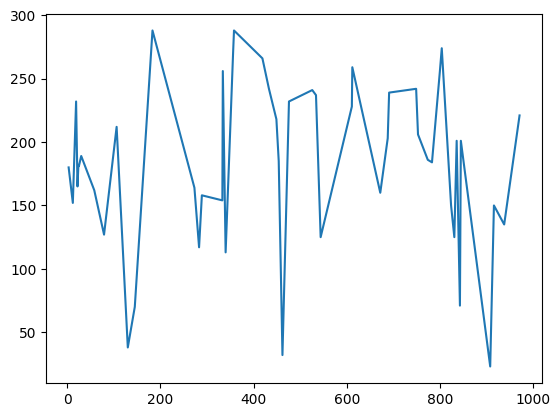

In [ ]:
test_reg_data.iloc[:,0].plot()

<Axes: >

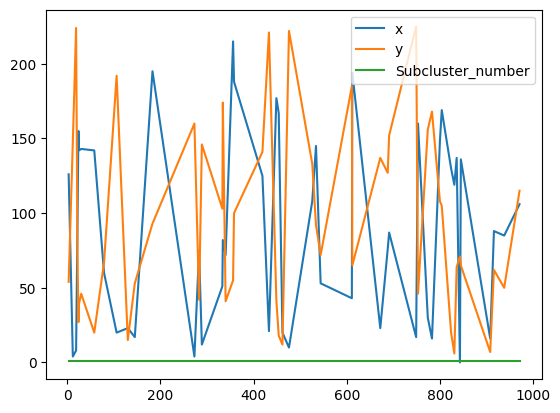

In [ ]:
test_reg_data.iloc[:,1:].plot()

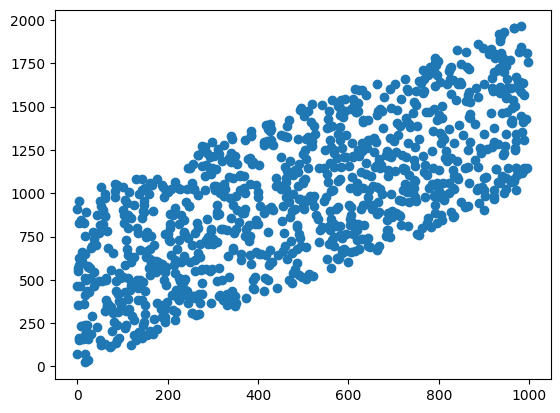

In [ ]:
plt.scatter(train_data["x"], train_data["z"])